## 2021F AML 3104 2 Neural Networks and Deep Learning

### FakeNews Detection using LSTM Neural Network
*Done by,*
**<br>Swathi Gurijila(C0790294)</br>**
**<br>Varadharajan Kalyanaraman(C0793756)</br>**
**<br>Vignesh Kumar Murugananthan(C0793760)</br>**

#### Preprocessing

In [1]:
import pandas as pd
import numpy as np

# NLP
import re
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# Data Profiling
import sweetviz as sv
from pandas_profiling import ProfileReport

# Visulization
import seaborn as sns
import matplotlib.pyplot as plt

# For clean Visualization
import warnings
warnings.filterwarnings('ignore')

## Importing datasets

In [2]:
# True news dataset from kaggle
df_real = pd.read_csv("../DataSet/true_news.csv", encoding='utf-8')

# Fake news dataset from kaggle
df_fake = pd.read_csv("../DataSet/fake_news.csv", encoding='utf-8')

# Data Flair news dataset, constist of true and fake news.
df_flair = pd.read_csv("../DataSet/data-flair-news.csv", encoding='utf-8')

## Exploratory Data Analysis

### Profiling

For exploratory data analysis, we use two profiling tools that provide a comprehensive report of the data.

In [3]:
def get_data_profiling(dataset, name):
    # Generating sweetwiz report
    sv_report = sv.analyze(df_real)  
    # Exporting sweetwiz report as .html
    sv_report.show_html(f"./Analysis/{name}_sweetviz.html") 
    # Generating pandas profiling report
    profiling = ProfileReport(dataset)  
    # Exporting pandas profiling report as .html
    profiling.to_file(f"./Analysis/{name}_pandas_profiling.html")

In [4]:
# Generating reports for all three datasets.
get_data_profiling(df_real, 'real')
get_data_profiling(df_fake, 'fake')
get_data_profiling(df_flair, 'flair')

                                             |                                             | [  0%]   00:00 ->…

Report ./Analysis/real_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

                                             |                                             | [  0%]   00:00 ->…

Report ./Analysis/fake_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

                                             |                                             | [  0%]   00:00 ->…

Report ./Analysis/flair_sweetviz.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Dataset analysis

Identifying features and shape

In [5]:
df_real.sample(5)

title  \
14735  UK has reservations about diplomatic protectio...   
11380  Taiwan says Chinese air force exercised near i...   
19174  Iraqi government asks foreign countries to sto...   
4933   Trump economic adviser Powell to be named depu...   
9290   Clinton attacks Trump's foreign policy as a th...   

                                                    text       subject  \
14735  LONDON (Reuters) - British Foreign Secretary B...     worldnews   
11380  TAIPEI (Reuters) - China s air force has carri...     worldnews   
19174  BAGHDAD (Reuters) - Iraq on Sunday urged forei...     worldnews   
4933   WASHINGTON (Reuters) - President Donald Trump’...  politicsNews   
9290   WASHINGTON (Reuters) - U.S. Democratic preside...  politicsNews   

                      date  
14735   November 15, 2017   
11380   December 26, 2017   
19174  September 24, 2017   
4933       March 16, 2017   
9290         June 2, 2016

In [6]:
df_fake.sample(5)

title  \
7226    You’re Gonna Want To See The Obamas Reading ‘...   
7266    Republicans Are Trying To Legislate How We Gr...   
4005    Military Expert Vows To Take Trump Up On His ...   
13085  WILL JULIAN ASSANGE BE ASSASSINATED Before He ...   
10253  SARAH HUCKABEE SANDERS MOCKS WH PRESS: Lists A...   

                                                    text   subject  \
7226   On Monday, President Obama and the First Lady ...      News   
7266   Republicans are repulsive people. This is a kn...      News   
4005   Donald Trump, like any bully, loves to talk cr...      News   
13085  Besides Trump, no one has a bigger target on h...  politics   
10253  Sarah Huckabee Sanders let the White House pre...  politics   

                   date  
7226     March 29, 2016  
7266     March 26, 2016  
4005   October 29, 2016  
13085       Sep 5, 2016  
10253       Aug 1, 2017

In [7]:
df_flair.sample(5)

Unnamed: 0                                              title  \
4084        8163  Harvard Cancels Men’s Soccer Season After Find...   
2849        1655                    Jeb Bush's view from the bottom   
4804        5118  5 Things To Know About Mike Pence Before Tuesd...   
1156        7794  Juror in Oregon militia trial dismissed for bi...   
5801        7555  SOME FLA. RESIDENTS PLAN ARMED TRICK-OR-TREATI...   

                                                   text label  
4084  Harvard Cancels Men’s Soccer Season After Find...  FAKE  
2849  Killing Obama administration rules, dismantlin...  REAL  
4804  5 Things To Know About Mike Pence Before Tuesd...  REAL  
1156  Reuters \nA juror in the trial of seven militi...  FAKE  
5801  Home › SOCIETY | US NEWS › SOME FLA. RESIDENTS...  FAKE

In [8]:
print(f"df_real shape:  {df_real.shape}")
print(f"df_fake shape:  {df_fake.shape}")
print(f"df_flair shape: {df_flair.shape}")

df_real shape:  (21417, 4)
df_fake shape:  (23481, 4)
df_flair shape: (6335, 4)


### Count plot for different categories of fake news

Text(0.5, 1.0, 'Count Plot for Different Categories of Fake News')

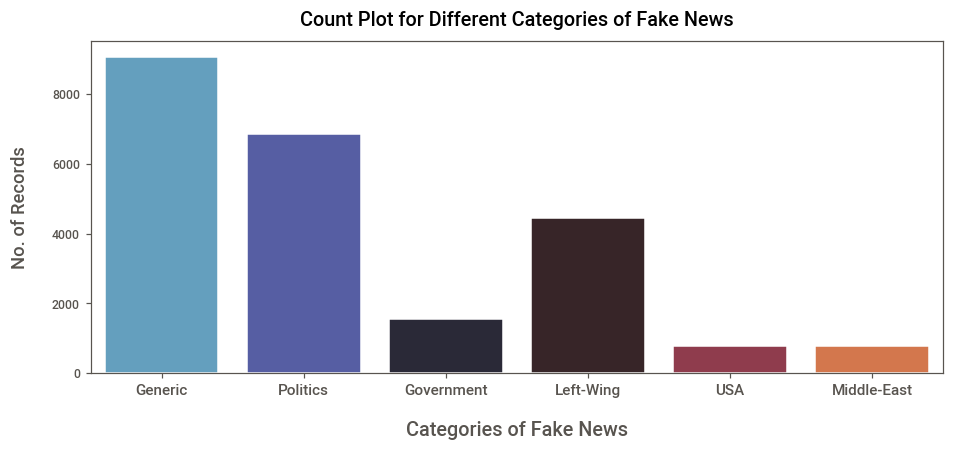

In [9]:
f, axes = plt.subplots(figsize=(10, 4), dpi=110, frameon=False)
sns.countplot(x="subject",
              palette="icefire",
              edgecolor="1",
              data=df_fake,
              ax=axes)
axes.set_xticklabels(labels=[
    'Generic', 'Politics', 'Government', 'Left-Wing', 'USA', 'Middle-East'
],
                     fontdict={"fontsize": 10})
axes.set_xlabel('Categories of Fake News',
                fontdict={
                    "fontsize": 13,
                    'fontweight': 3
                },
                labelpad=15)
axes.set_ylabel('No. of Records',
                fontdict={
                    "fontsize": 12,
                    'fontweight': 2
                },
                labelpad=15)
axes.set_title('Count Plot for Different Categories of Fake News',
               fontdict={
                   "fontsize": 13,
                   'fontweight': 3
               },
               pad=10)

Text(0.5, 1.0, 'Count Plot for Different Categories of Real News')

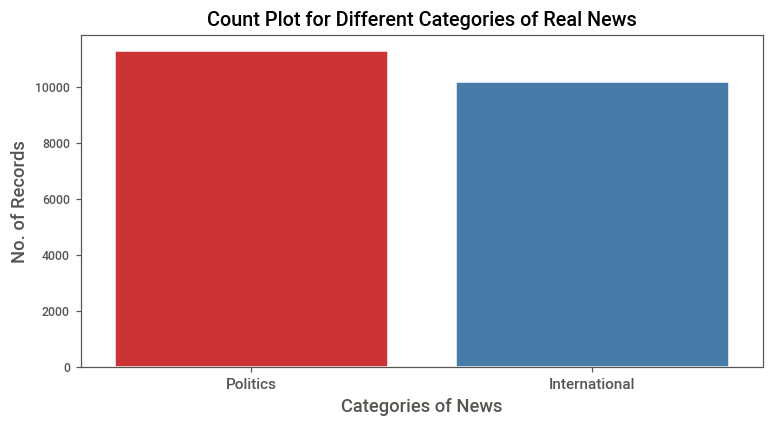

In [10]:
f, axes = plt.subplots(figsize=(8, 4), dpi=110, frameon=False)
sns.countplot(x="subject",
              palette="Set1",
              edgecolor="1",
              data=df_real,
              ax=axes)
axes.set_xticklabels(labels=['Politics', 'International'],
                     fontdict={"fontsize": 10})
axes.set_xlabel('Categories of News',
                fontdict={
                    "fontsize": 12,
                    'fontweight': 2
                })
axes.set_ylabel('No. of Records', fontdict={"fontsize": 12, 'fontweight': 2})
axes.set_title('Count Plot for Different Categories of Real News',
               fontdict={
                   "fontsize": 13,
                   'fontweight': 2
               })

### Word Cloud - Fake News

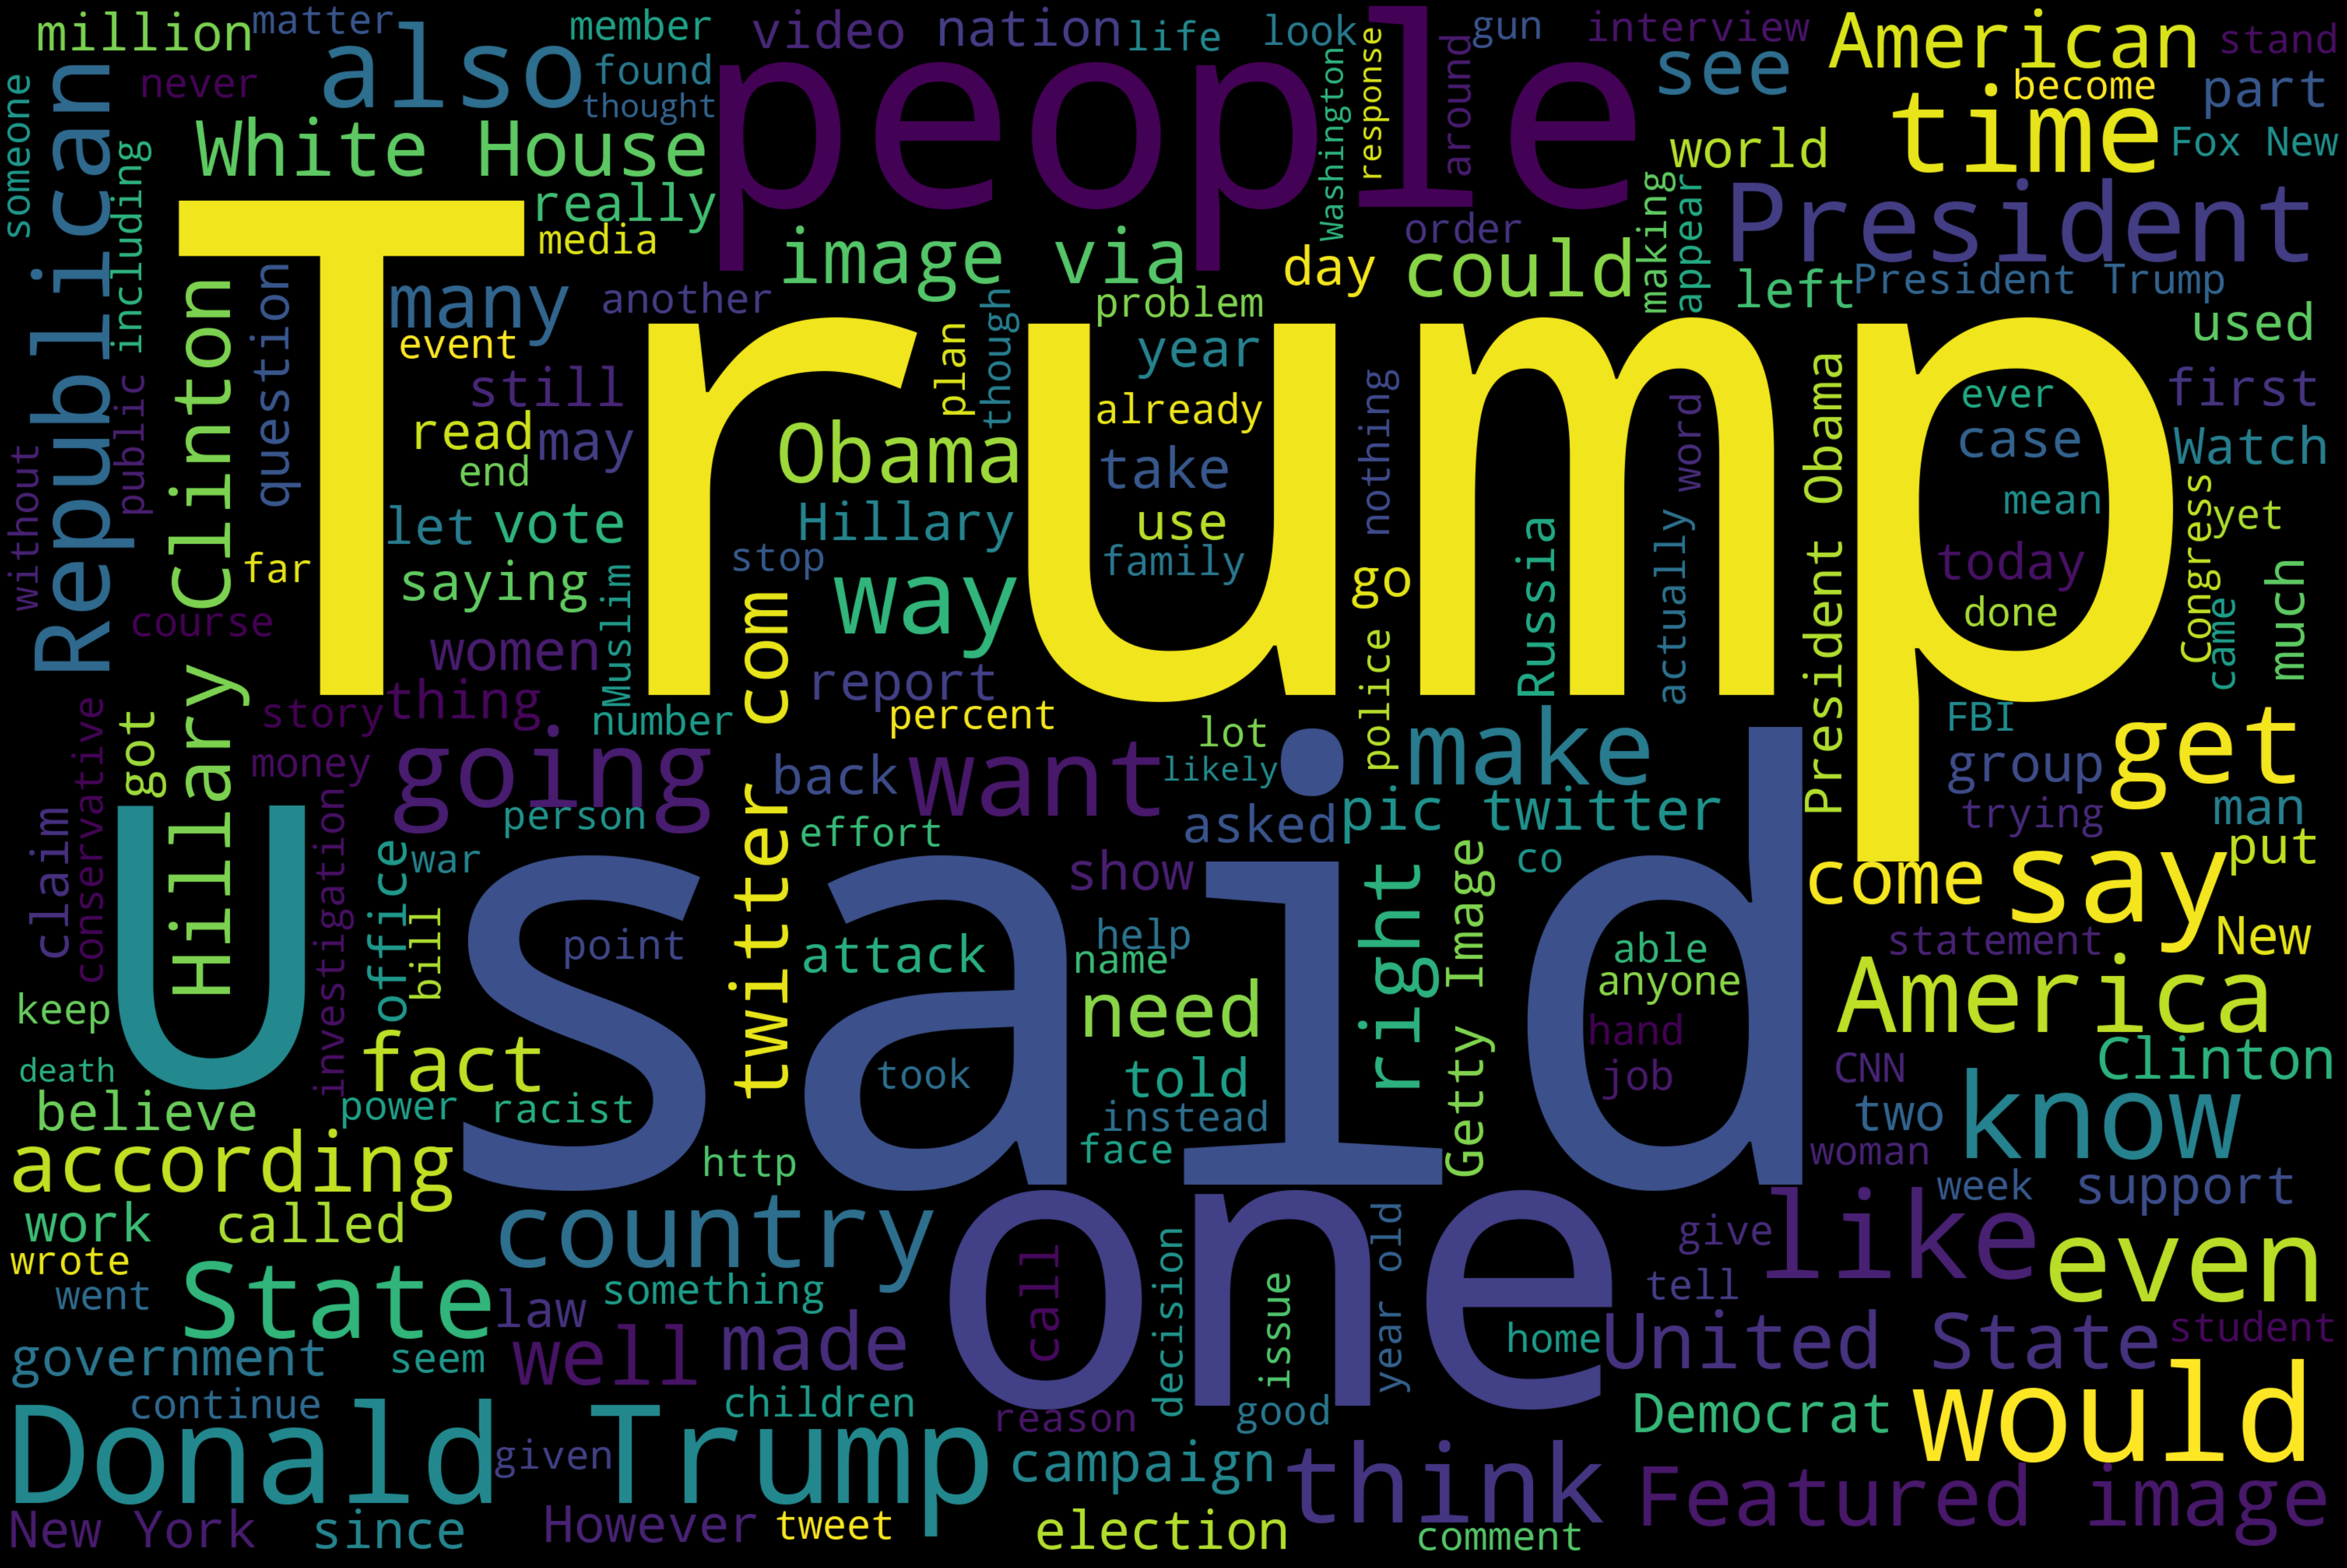

In [11]:
text = ''
for news in df_fake.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

### Word Cloud - Real News

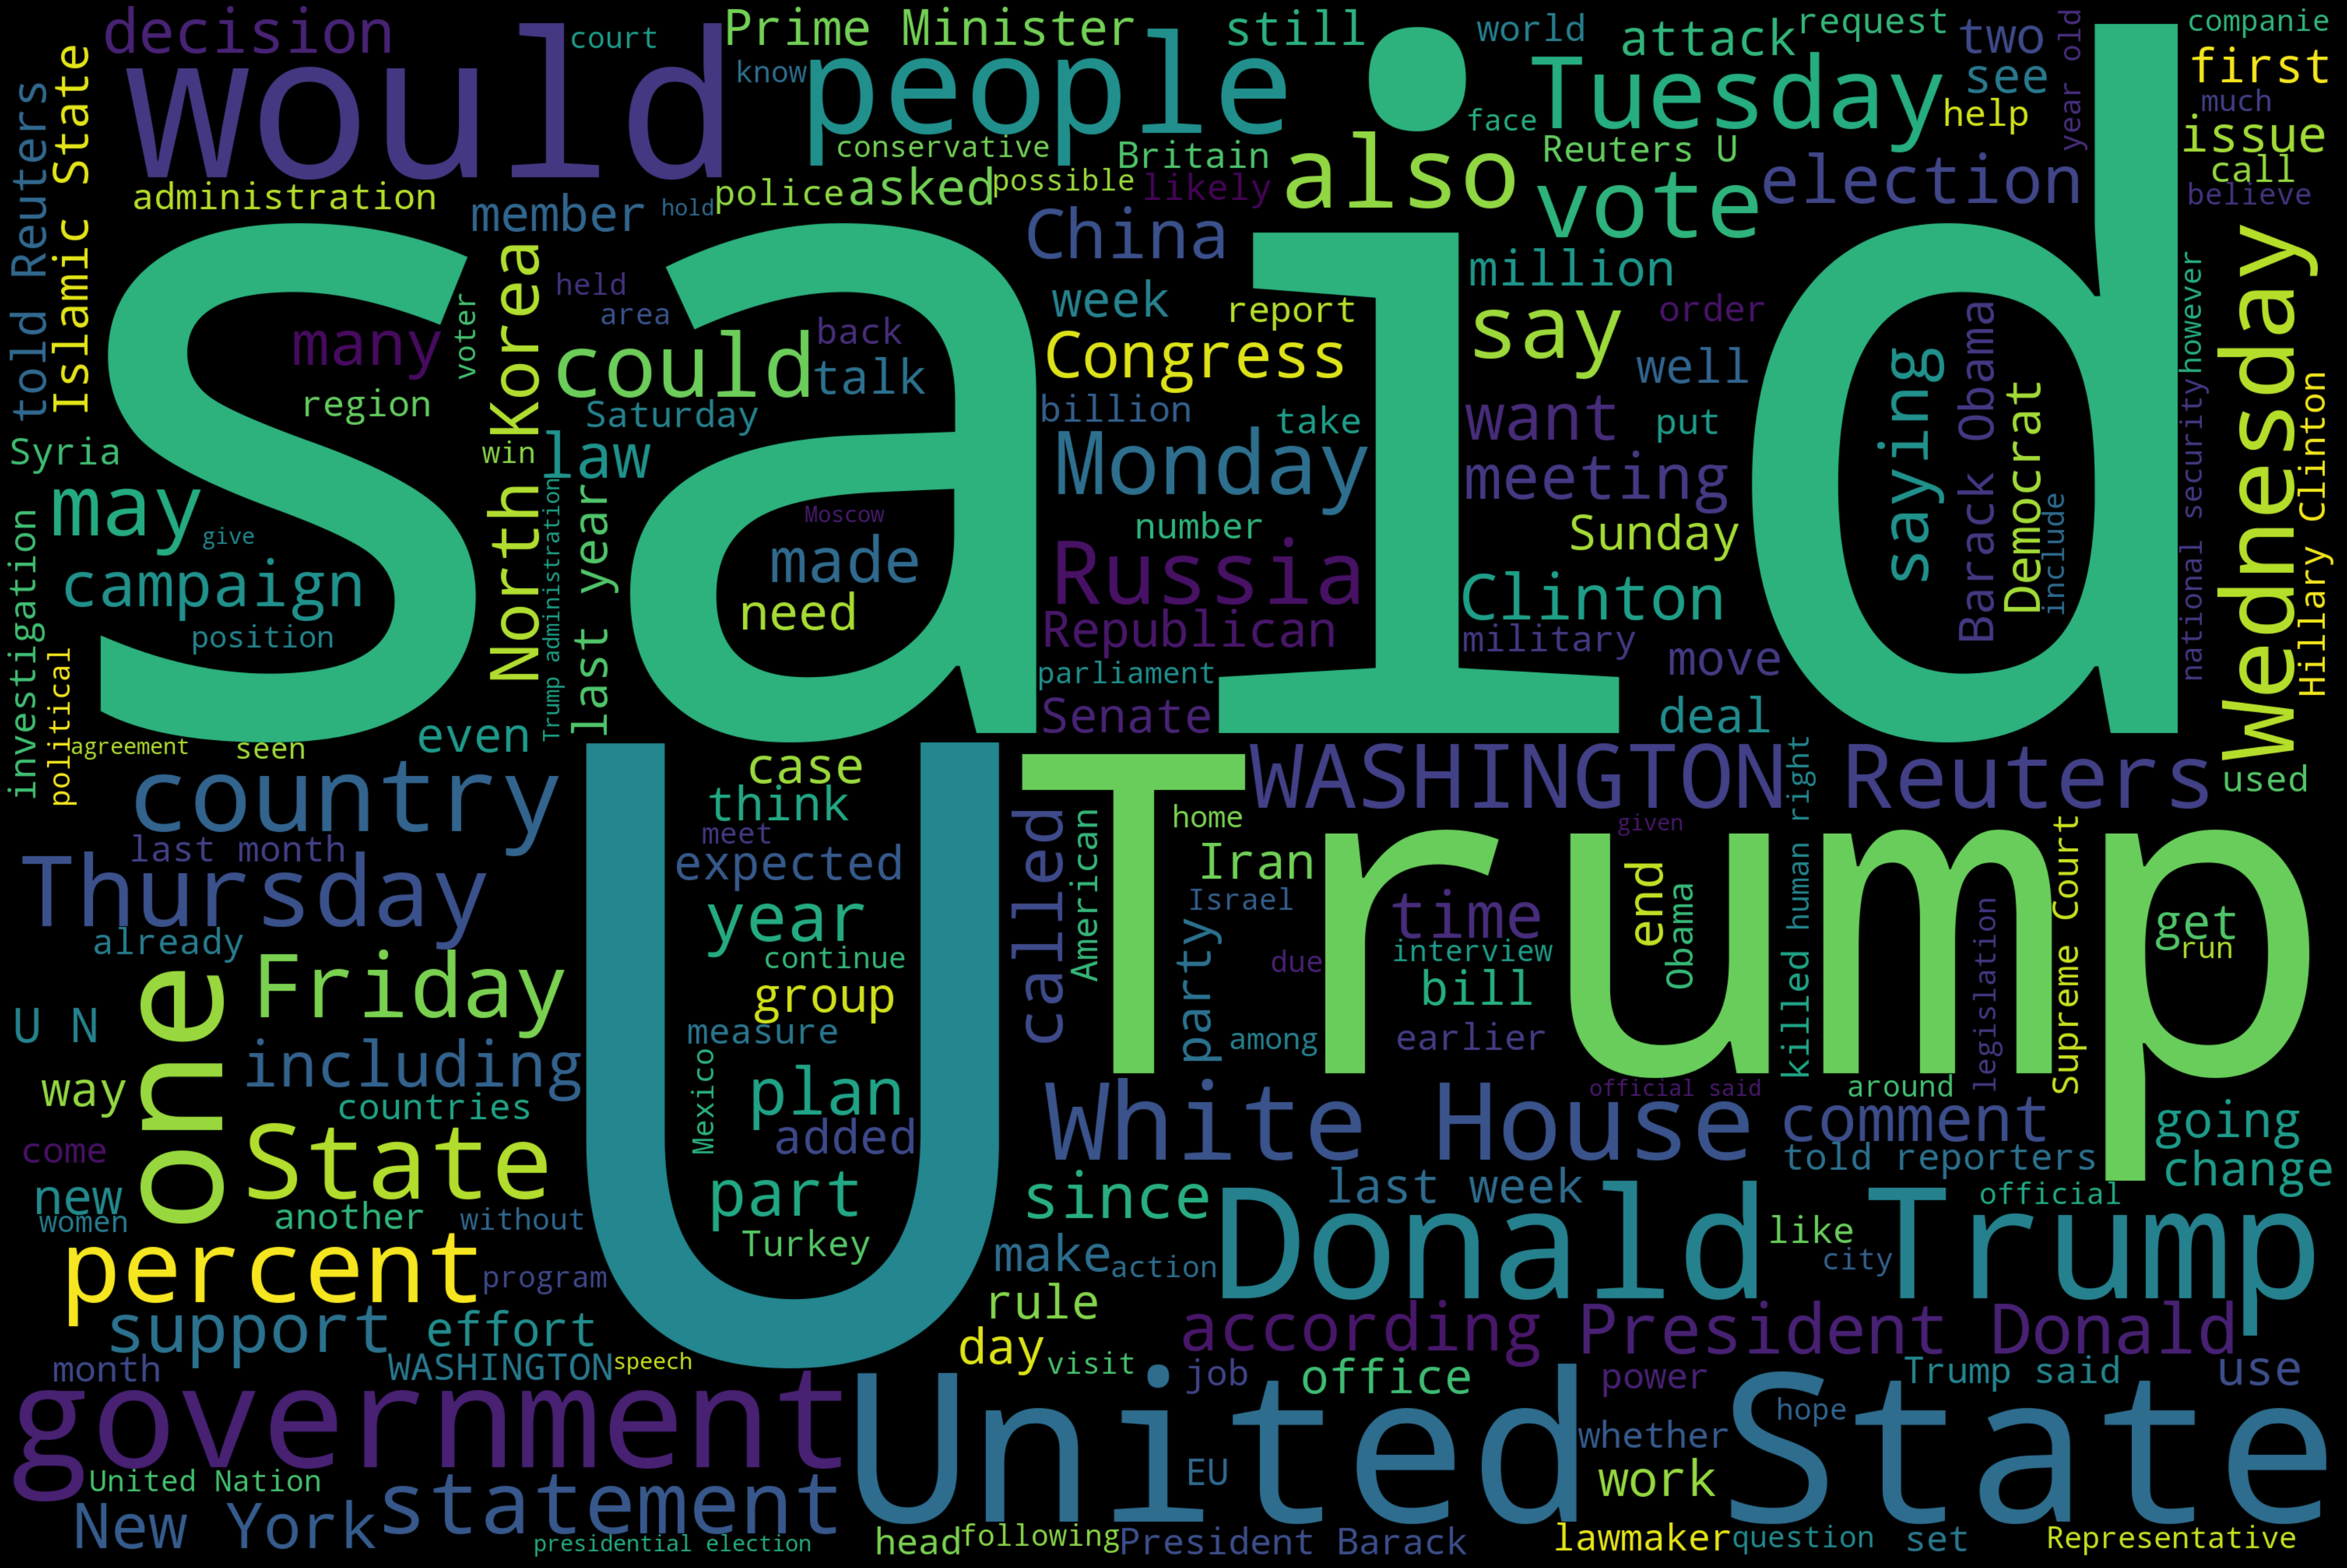

In [12]:
text = ''
for news in df_real.text.values:
    text += f" {news}"
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
del text

## Data cleaning

### Null handling

In [13]:
print("{:<18} {:<12} {:<7} {:<50} {}".format('DataSource', 'Shape', 'Nulls',
                                             'Columns', 'Column-wise Nulls'))
print("{:<18} {:<12} {:<7} {:<50} {}".format(17 * '-', 12 * '-', 7 * '-',
                                             50 * '-', 25 * '-'))
print("\n{:<18} {:<12} {:<7} {:<50} {}".format(
    'Kaggle Real-News', str(df_real.shape),
    str(sum(df_real.isnull().sum().tolist())), str(list(df_real.columns)),
    str(df_real.isnull().sum().tolist())))
print("{:<18} {:<12} {:<7} {:<50} {}".format(
    'Kaggle Fake-News', str(df_fake.shape),
    str(sum(df_fake.isnull().sum().tolist())), str(list(df_fake.columns)),
    str(df_fake.isnull().sum().tolist())))
print("{:<18} {:<12} {:<7} {:<50} {}".format(
    'Flair News', str(df_flair.shape), str(sum(df_flair.isnull().sum().tolist())),
    str(list(df_flair.columns)), str(df_flair.isnull().sum().tolist())))
print("\n{:<18} {:<12} {:<7} {:<50} {}".format(17 * '-', 12 * '-', 7 * '-',
                                               50 * '-', 25 * '-'))
total = df_real.shape[0] + df_fake.shape[0] + df_flair.shape[0]
nulls = sum(df_real.isnull().sum().tolist()) + sum(
    df_fake.isnull().sum().tolist()) + sum(df_flair.isnull().sum().tolist())
remain = total - nulls
print("{:<18} {:<12} {:<7} {:<50} {}".format(
    'Total', 'Rows-' + str(total), str(nulls),
    str(
        list(
            set(list(df_real.columns)) | set(list(df_fake.columns))
            | set(list(df_flair.columns)))), ''))
print('\n\nDropping Nulls - After Max damage remain: ', remain)

DataSource         Shape        Nulls   Columns                                            Column-wise Nulls
-----------------  ------------ ------- -------------------------------------------------- -------------------------

Kaggle Real-News   (21417, 4)   0       ['title', 'text', 'subject', 'date']               [0, 0, 0, 0]
Kaggle Fake-News   (23481, 4)   0       ['title', 'text', 'subject', 'date']               [0, 0, 0, 0]
Flair News         (6335, 4)    0       ['Unnamed: 0', 'title', 'text', 'label']           [0, 0, 0, 0]

-----------------  ------------ ------- -------------------------------------------------- -------------------------
Total              Rows-51233   0       ['label', 'text', 'subject', 'title', 'date', 'Unnamed: 0'] 


Dropping Nulls - After Max damage remain:  51233


### Uniformity

**Text format**

Looking at the Sample data, focusing on 'Text' column values:

* Real news data frame:  has publication and source of news starting of the text
* Fake news data frame:  Doesn't
* Flair news data frame: Doesn't

It is important to make it unified before merging them and preparing them for modelling.

In [14]:
# Extracting list without publications
without_pub = []
for index, row in enumerate(df_real.text.values):
    try:
        # Try will throw excution to except if publisher not found
        record = row.split(" -", maxsplit=1)
        record[1]
        # Setting publisher text limit 260 [This much longer Publisher name is risk to text loss]
        # Following will give error, ensuring no text having "-" in between is counted
        assert (len(record[0]) < 260)
    except:
        without_pub.append(index)

In [15]:
# Check the length and data without publisher
df_real.iloc[without_pub].text

3488     The White House on Wednesday disclosed a group...
4358     Neil Gorsuch, President Donald Trump’s appoint...
4465     WASHINGTON The clock began running out this we...
5784     Federal appeals court judge Neil Gorsuch, the ...
6660     Republican members of Congress are complaining...
6823     Over the course of the U.S. presidential campa...
7922     After going through a week reminiscent of Napo...
8194     The following timeline charts the origin and s...
8195     Global health officials are racing to better u...
8247     U.S. President Barack Obama visited a street m...
8465     ALGONAC, MICH.—Parker Fox drifted out of the D...
8481     Global health officials are racing to better u...
8482     The following timeline charts the origin and s...
8505     Global health officials are racing to better u...
8506     The following timeline charts the origin and s...
8771     In a speech weighted with America’s complicate...
8970                                                    

In [16]:
print(f'No. of news without publisher: {len(df_real.iloc[without_pub].text)}')

No. of news without publisher: 23


In [17]:
# Checking for rows with empty text
[
    index for index, text in enumerate(df_real.text.values)
    if str(text).strip() == ''
]

[8970]

In [18]:
# Dropping this record
real = df_real.drop(8970, axis=0)

In [19]:
# Seperating Publication from text values
publ = []
tmp_text = []
for index, row in enumerate(df_real.text.values):
    if index in without_pub:
        tmp_text.append(row)
        # Adding Unknown as for the rows which found without publishers
        publ.append("Unknown")
        continue
    record = row.split(" -", maxsplit=1)
    publ.append(record[0])
    tmp_text.append(record[1])

In [20]:
# Adding seperate column for publication info and Replace existing text column with new text
df_real["publisher"] = publ
df_real["text"] = tmp_text

In [21]:
df_real.sample(5)

title  \
19693  China, Singapore look to put difficulties behi...   
6022   Rights advocates slam Trump plans on Muslim im...   
16942  China summons British official over Hong Kong ...   
15064  Protesters flood Barcelona demanding release o...   
5986   Defying Trump, Twitter feeds for U.S. governme...   

                                                    text       subject  \
19693   China and Singapore on Tuesday sought to put ...     worldnews   
6022    Immigrant and refugee advocates on Wednesday ...  politicsNews   
16942   China has summoned a British official in Beij...     worldnews   
15064   Hundreds of thousands of Catalan independence...     worldnews   
5986    Rogue Twitter feeds voicing employee concerns...  politicsNews   

                      date            publisher  
19693  September 19, 2017     BEIJING (Reuters)  
6022     January 25, 2017    NEW YORK (Reuters)  
16942    October 20, 2017     BEIJING (Reuters)  
15064   November 11, 2017   BARCELONA (Reuters)  
5986     January 26, 2017             (Reuters)

**For Fake News**

In [22]:
# Extracting list without publications
without_pub = []
for index, row in enumerate(df_fake.text.values):
    try:
        # Try will throw excution to except if publisher not found
        record = row.split(" -", maxsplit=1)
        record[1]
        # Setting publisher text limit 260 [This much longer Publisher name is risk to text loss]
        # Following will give error, ensuring no text having "-" in between is counted
        assert (len(record[0]) < 260)
    except:
        without_pub.append(index)

In [23]:
print(
    f'No. of news without publisher: {len(df_fake.iloc[without_pub].text)}\nTotal Length: {len(df_fake.text)}'
)

No. of news without publisher: 23422
Total Length: 23481


In [24]:
# Seperating Publication from text values
publ = []
tmp_text = []
for index, row in enumerate(df_fake.text.values):
    if index in without_pub:
        tmp_text.append(row)
        # Adding Unknown as for the rows which found without publishers
        publ.append("Unknown")
        continue
    record = row.split(" -", maxsplit=1)
    publ.append(record[0])
    tmp_text.append(record[1])

In [25]:
# Adding seperate column for publication info and Replace existing text column with new text
df_fake["publisher"] = publ
df_fake["text"] = tmp_text

In [26]:
df_fake.sample(5)

title  \
11306  SHOCKING REPORT: 50% of Babies in 24 States Bo...   
21681  HOW OBAMA’S NEW DOJ PLANS TO BYPASS CONGRESS T...   
20772  SARAH PALIN ASKS AZEALIA BANKS To Join Her To ...   
9297   20 TIME DEPORTED MEXICAN Laughs While Being Se...   
21274  Father Of Triplets Tells Surrogate Mother To K...   

                                                    text    subject  \
11306  New Mexico led all states with 72 percent of t...   politics   
21681  Eric Holder in a skirt Obama s Department of J...  left-news   
20772   Trump and Palin etc, represent the contempt t...  left-news   
9297   Next time you see a Democrat lawmaker, thank t...   politics   
21274  So this man who so desperately wanted children...  left-news   

               date publisher  
11306  Mar 24, 2017   Unknown  
21681   Jun 1, 2015   Unknown  
20772   Apr 6, 2016   Unknown  
9297    Dec 2, 2017   Unknown  
21274   Dec 1, 2015   Unknown

In [27]:
# Checking for the same in fake news
empty_fake_index = [
    index for index, text in enumerate(df_fake.text.values)
    if str(text).strip() == ''
]
print(f"No of empty rows: {len(empty_fake_index)}")
df_fake.iloc[empty_fake_index].tail()

No of empty rows: 630


title text    subject  \
21816  BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...       left-news   
21826  FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...       left-news   
21827  (VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...       left-news   
21857  (VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...       left-news   
21873  (VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...       left-news   

               date publisher  
21816  Apr 27, 2015   Unknown  
21826  Apr 25, 2015   Unknown  
21827  Apr 25, 2015   Unknown  
21857  Apr 14, 2015   Unknown  
21873  Apr 12, 2015   Unknown

Total 630 rows which has text column empty<br>
Instead having all news in title column - merging title values to text column<br>
Making Full-News as 'text' single column will solve this problem<br>

In [28]:
# First Let's make single dataset for both kaggle source
# Two different files for binary classification
# Adding feature 'label'
# Real = 1 & Fake = 0
df_real['label'] = 1
df_fake['label'] = 0

In [29]:
# Concatinating two kaggle source DataSet
df = pd.concat([df_real, df_fake]).reset_index(drop=True)
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0   The head of a conservative Republican faction...  politicsNews   
1   Transgender people will be allowed for the fi...  politicsNews   
2   The special counsel investigation of links be...  politicsNews   
3   Trump campaign adviser George Papadopoulos to...  politicsNews   
4   President Donald Trump called on the U.S. Pos...  politicsNews   

                 date                     publisher  label  
0  December 31, 2017           WASHINGTON (Reuters)      1  
1  December 29, 2017           WASHINGTON (Reuters)      1  
2  December 31, 2017           WASHINGTON (Reuters)      1  
3  December 30, 2017           WASHINGTON (Reuters)      1  
4  December 29, 2017   SEATTLE/WASHINGTON (Reuters)      1

In [30]:
df['text'] = df['title'] + ' ' + df['text']
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  As U.S. budget fight looms, Republicans flip t...  politicsNews   
1  U.S. military to accept transgender recruits o...  politicsNews   
2  Senior U.S. Republican senator: 'Let Mr. Muell...  politicsNews   
3  FBI Russia probe helped by Australian diplomat...  politicsNews   
4  Trump wants Postal Service to charge 'much mor...  politicsNews   

                 date                     publisher  label  
0  December 31, 2017           WASHINGTON (Reuters)      1  
1  December 29, 2017           WASHINGTON (Reuters)      1  
2  December 31, 2017           WASHINGTON (Reuters)      1  
3  December 30, 2017           WASHINGTON (Reuters)      1  
4  December 29, 2017   SEATTLE/WASHINGTON (Reuters)      1

In [31]:
print('\n' + 15 * '-' + 'Kaggle Source' + 15 * '-')
my_dict = {
    'title': 'The title of the article',
    'text': 'The text of the article',
    'subject': 'The subject of the article',
    'date': 'The date at which the article was posted',
    'label': 'Fake=0/Real=1'
}
df_attr = pd.DataFrame(list(my_dict.items()),
                       columns=['Attribute Information', 'Values'])

df_attr.style.hide_index().set_table_styles([
    dict(selector='th', props=[('text-align', 'left')])
]).set_properties(**{'text-align': 'left'})


---------------Kaggle Source---------------


In [32]:
print('\n' + 15 * '-' + 'Flair Source' + 15 * '-')
my_dict = {
    'id': 'Unique Number',
    'title': 'The title of the article',
    'text': 'The text of the article',
    'label': 'Fake=FAKE/Real=REAL'
}
df_attr = pd.DataFrame(list(my_dict.items()),
                       columns=['Attribute Information', 'Values'])

df_attr.style.hide_index().set_table_styles([
    dict(selector='th', props=[('text-align', 'left')])
]).set_properties(**{'text-align': 'left'})


---------------Flair Source---------------


In [33]:
print('\n' + 15 * '-' + 'Kaggle Source' + 15 * '-' + '\n')
df.info()


---------------Kaggle Source---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      44898 non-null  object
 1   text       44898 non-null  object
 2   subject    44898 non-null  object
 3   date       44898 non-null  object
 4   publisher  44898 non-null  object
 5   label      44898 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [34]:
print('\n' + 15 * '-' + 'Flair Source' + 15 * '-' + '\n')
df_flair.info()


---------------Flair Source---------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [35]:
# Let's Check Flair samples again
df_flair.sample(5)

Unnamed: 0                                              title  \
4200         721  Obama says world leaders right to be 'rattled'...   
2205        1385  Why America might elect a president it doesn't...   
1751        2122  How America is quietly becoming a climate chan...   
763         6551                   The Truth About Atlantis [Video]   
5770        3344  State Department will not release 22 'top secr...   

                                                   text label  
4200  President Obama said world leaders were right ...  REAL  
2205  Donald Trump and Hillary Clinton have among th...  REAL  
1751  Actions by the Obama administration and severa...  REAL  
763   Leave a reply \nAlexandra Bruce – Celebrated a...  FAKE  
5770  (CNN) The State Department announced Friday th...  REAL

In [36]:
# Here, No issue with text, No publisher included in that.
# Let's check if any null text available
empty_flair_index = [
    index for index, text in enumerate(df_flair.text.values)
    if str(text).strip() == ''
]
print(f"No of empty rows: {len(empty_flair_index)}")
df_flair.iloc[empty_flair_index].tail()

No of empty rows: 36


Unnamed: 0                                              title text label
5699        9467              A Fifth Clinton Presidency? Hill, No!       FAKE
5772        5324                         Huma’s Weiner Dogs Hillary       FAKE
6064        6127  Radio Derb: Peak White Guilt, PC Now To The LE...       FAKE
6175        7043  Hillary’s High Crimes & Misdemeanors Threaten ...       FAKE
6328        9337  Radio Derb Is On The Air–Leonardo And Brazil’s...       FAKE

In [37]:
# Same way merging title of the news with text column
df_flair['text'] = df_flair['title'] + ' ' + df_flair['text']
df_flair.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  You Can Smell Hillary’s Fear Daniel Greenfield...  FAKE  
1  Watch The Exact Moment Paul Ryan Committed Pol...  FAKE  
2  Kerry to go to Paris in gesture of sympathy U....  REAL  
3  Bernie supporters on Twitter erupt in anger ag...  FAKE  
4  The Battle of New York: Why This Primary Matte...  REAL

In [38]:
# As we have our dataframe with lables Fake=0 and Real=1
# Need to map this dataset label with same, too
labels = dict(FAKE=0, REAL=1)
df_flair['label'] = df_flair['label'].map(labels)

In [39]:
df_flair.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text  label  
0  You Can Smell Hillary’s Fear Daniel Greenfield...      0  
1  Watch The Exact Moment Paul Ryan Committed Pol...      0  
2  Kerry to go to Paris in gesture of sympathy U....      1  
3  Bernie supporters on Twitter erupt in anger ag...      0  
4  The Battle of New York: Why This Primary Matte...      1

In [40]:
# Time to remove unnecessary columns and merging all dataframes
df = df.drop(["subject", "date", "title", "publisher"], axis=1)
df_flair = df_flair.drop(["Unnamed: 0", "title"], axis=1)
df = df.append(df_flair, ignore_index=True)
df

text  label
0      As U.S. budget fight looms, Republicans flip t...      1
1      U.S. military to accept transgender recruits o...      1
2      Senior U.S. Republican senator: 'Let Mr. Muell...      1
3      FBI Russia probe helped by Australian diplomat...      1
4      Trump wants Postal Service to charge 'much mor...      1
...                                                  ...    ...
51228  State Department says it can't find emails fro...      1
51229  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...      0
51230  Anti-Trump Protesters Are Tools of the Oligarc...      0
51231  In Ethiopia, Obama seeks progress on peace, se...      1
51232  Jeb Bush Is Suddenly Attacking Trump. Here's W...      1

[51233 rows x 2 columns]

### Handling Duplicate Values

In [41]:
df.nunique()

text     45410
label        2
dtype: int64

In [42]:
# df['text'].duplicated().value_counts()

In [43]:
df[df['text'].duplicated() == True]

text  label
445    Senate tax bill stalls on deficit-focused 'tri...      1
778    Trump warns 'rogue regime' North Korea of grav...      1
892    Republicans unveil tax cut bill, but the hard ...      1
896    Trump taps Fed centrist Powell to lead U.S. ce...      1
974    Two ex-Trump aides charged in Russia probe, th...      1
...                                                  ...    ...
50864  There’s a good reason protesters at the Univer...      1
50981  Biden Blames “Lazy American Women” For The Eco...      0
51046  Hillary’s “Big Tent” is Obama’s “Grand Bargain...      0
51125  ISIS uses an industrial dough kneader to kill ...      0
51131  North Korea Threatens ‘Sacred’ Nuclear War Aga...      0

[5823 rows x 2 columns]

In [44]:
df['text'].iloc[778]

"Trump warns 'rogue regime' North Korea of grave danger  U.S. President Donald Trump arrived in China on Wednesday seeking help to rein in North Korea, telling the reclusive state’s leader he was putting his country in grave danger by developing nuclear weapons. Trump used some of his toughest language yet against North Korea in a wide-ranging address in Seoul that lodged specific accusations of chilling human rights abuses. He called on countries around the world to isolate Pyongyang by denying it “any form of support, supply or acceptance.” “Do not underestimate us and do not try us,” Trump told North Korea as he wrapped up a visit to South Korea with a speech to the National Assembly before heading to Beijing, where he was making his first official visit. Trump painted a dystopian picture of the reclusive North, saying people were suffering in “gulags” and some bribed government officials to work as “slaves” overseas rather than live under the government at home. He offered no evide

In [45]:
for i in range(len(df)):
    if df['text'].iloc[i] == df['text'].iloc[778]:
        print(i)

762
778


In [46]:
df['text'].iloc[762]

"Trump warns 'rogue regime' North Korea of grave danger  U.S. President Donald Trump arrived in China on Wednesday seeking help to rein in North Korea, telling the reclusive state’s leader he was putting his country in grave danger by developing nuclear weapons. Trump used some of his toughest language yet against North Korea in a wide-ranging address in Seoul that lodged specific accusations of chilling human rights abuses. He called on countries around the world to isolate Pyongyang by denying it “any form of support, supply or acceptance.” “Do not underestimate us and do not try us,” Trump told North Korea as he wrapped up a visit to South Korea with a speech to the National Assembly before heading to Beijing, where he was making his first official visit. Trump painted a dystopian picture of the reclusive North, saying people were suffering in “gulags” and some bribed government officials to work as “slaves” overseas rather than live under the government at home. He offered no evide

In [47]:
df.drop_duplicates(subset=['text'], inplace=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45410 entries, 0 to 51232
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    45410 non-null  object
 1   label   45410 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


*As we are done with removing all the duplicate values in our dataset, we can go ahead with Language Cleaning, that is to remove special charecters, symbols, emois, URLs etc.*


## Language Cleaning

We remove urls (if any)<br>
Perform decontractions<br>
Non-acronize few popular words<br>
Typos, slang and informal abbreviations<br>
Character entity references<br>
Remove HTML tags<br>
Remove emoticons, symbols, pictoraphs, transport and map symbols & flags<br>
Remove punctuations and all special characters<br>
Remove stopwords

In [49]:
nltk_stopwords = stopwords.words('english')
stopwords = set(nltk_stopwords)
print(stopwords)

{'aren', 'yours', 'down', 'there', "haven't", "you've", 'until', 'all', 'doesn', 'very', 'was', 'these', 'being', 'wasn', 'd', 'themselves', 'not', 'am', 'while', 'in', 'more', 'couldn', 'below', 'no', 'with', 'don', 'yourself', 'll', 'through', 'i', 'ours', 'on', 'same', 'that', 'were', 'has', 'of', 'ain', "it's", "couldn't", 'them', 'why', 'both', 'just', 'any', 'by', "hasn't", "wouldn't", 's', 'myself', 'a', 'or', 'having', 'between', 'then', 'about', 'for', 'can', 'few', "should've", 'himself', 'where', 'been', 'didn', 'too', 'our', 'who', 'will', 'off', 'does', 'is', 'your', 'above', 'this', "doesn't", "mightn't", 'my', 'he', 'she', 'his', 'those', 'here', 'mustn', 'nor', 'they', 'isn', 'at', "needn't", 'be', 've', 'each', "didn't", 'hadn', 'itself', 'its', 'whom', 'the', 'wouldn', 'further', 'such', "shouldn't", 'what', 'theirs', 'doing', 'you', 'now', "don't", 'and', 'did', 'are', 'only', 'before', 'after', 'if', 'shan', 'from', 'again', 'her', 'other', "you'll", "that'll", 'so'

In [50]:
ps = PorterStemmer()
lm = WordNetLemmatizer() 

In [51]:
def clean_text(text):

    text = re.sub("http\S+", '', str(text))

    # Contractions ref: https://www.kaggle.com/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert
    text = re.sub(r"he's", "he is", str(text))
    text = re.sub(r"there's", "there is", str(text))
    text = re.sub(r"We're", "We are", str(text))
    text = re.sub(r"That's", "That is", str(text))
    text = re.sub(r"won't", "will not", str(text))
    text = re.sub(r"they're", "they are", str(text))
    text = re.sub(r"Can't", "Cannot", str(text))
    text = re.sub(r"wasn't", "was not", str(text))
    text = re.sub(r"aren't", "are not", str(text))
    text = re.sub(r"isn't", "is not", str(text))
    text = re.sub(r"What's", "What is", str(text))
    text = re.sub(r"haven't", "have not", str(text))
    text = re.sub(r"hasn't", "has not", str(text))
    text = re.sub(r"There's", "There is", str(text))
    text = re.sub(r"He's", "He is", str(text))
    text = re.sub(r"It's", "It is", str(text))
    text = re.sub(r"You're", "You are", str(text))
    text = re.sub(r"I'M", "I am", str(text))
    text = re.sub(r"shouldn't", "should not", str(text))
    text = re.sub(r"wouldn't", "would not", str(text))
    text = re.sub(r"i'm", "I am", str(text))
    text = re.sub(r"I'm", "I am", str(text))
    text = re.sub(r"Isn't", "is not", str(text))
    text = re.sub(r"Here's", "Here is", str(text))
    text = re.sub(r"you've", "you have", str(text))
    text = re.sub(r"we're", "we are", str(text))
    text = re.sub(r"what's", "what is", str(text))
    text = re.sub(r"couldn't", "could not", str(text))
    text = re.sub(r"we've", "we have", str(text))
    text = re.sub(r"who's", "who is", str(text))
    text = re.sub(r"y'all", "you all", str(text))
    text = re.sub(r"would've", "would have", str(text))
    text = re.sub(r"it'll", "it will", str(text))
    text = re.sub(r"we'll", "we will", str(text))
    text = re.sub(r"We've", "We have", str(text))
    text = re.sub(r"he'll", "he will", str(text))
    text = re.sub(r"Y'all", "You all", str(text))
    text = re.sub(r"Weren't", "Were not", str(text))
    text = re.sub(r"Didn't", "Did not", str(text))
    text = re.sub(r"they'll", "they will", str(text))
    text = re.sub(r"they'd", "they would", str(text))
    text = re.sub(r"DON'T", "DO NOT", str(text))
    text = re.sub(r"they've", "they have", str(text))
    text = re.sub(r"i'd", "I would", str(text))
    text = re.sub(r"should've", "should have", str(text))
    text = re.sub(r"where's", "where is", str(text))
    text = re.sub(r"we'd", "we would", str(text))
    text = re.sub(r"i'll", "I will", str(text))
    text = re.sub(r"weren't", "were not", str(text))
    text = re.sub(r"They're", "They are", str(text))
    text = re.sub(r"let's", "let us", str(text))
    text = re.sub(r"it's", "it is", str(text))
    text = re.sub(r"can't", "cannot", str(text))
    text = re.sub(r"don't", "do not", str(text))
    text = re.sub(r"you're", "you are", str(text))
    text = re.sub(r"i've", "I have", str(text))
    text = re.sub(r"that's", "that is", str(text))
    text = re.sub(r"i'll", "I will", str(text))
    text = re.sub(r"doesn't", "does not", str(text))
    text = re.sub(r"i'd", "I would", str(text))
    text = re.sub(r"didn't", "did not", str(text))
    text = re.sub(r"ain't", "am not", str(text))
    text = re.sub(r"you'll", "you will", str(text))
    text = re.sub(r"I've", "I have", str(text))
    text = re.sub(r"Don't", "do not", str(text))
    text = re.sub(r"I'll", "I will", str(text))
    text = re.sub(r"I'd", "I would", str(text))
    text = re.sub(r"Let's", "Let us", str(text))
    text = re.sub(r"you'd", "You would", str(text))
    text = re.sub(r"It's", "It is", str(text))
    text = re.sub(r"Ain't", "am not", str(text))
    text = re.sub(r"Haven't", "Have not", str(text))
    text = re.sub(r"Could've", "Could have", str(text))
    text = re.sub(r"youve", "you have", str(text))

    # Abbreviations
    text = re.sub("U.S.", "United States", str(text))
    text = re.sub("Dec", "December", str(text))
    text = re.sub("Jan.", "January", str(text))

    # Typos, slang and informal abbreviations
    text = re.sub(r"w/e", "whatever", str(text))
    text = re.sub(r"w/", "with", str(text))
    text = re.sub(r"USAgov", "USA government", str(text))
    text = re.sub(r"recentlu", "recently", str(text))
    text = re.sub(r"Ph0tos", "Photos", str(text))
    text = re.sub(r"amirite", "am I right", str(text))
    text = re.sub(r"exp0sed", "exposed", str(text))
    text = re.sub(r"<3", "love", str(text))
    text = re.sub(r"amageddon", "armageddon", str(text))
    text = re.sub(r"Trfc", "Traffic", str(text))
    text = re.sub(r"WindStorm", "Wind Storm", str(text))
    text = re.sub(r"TRAUMATISED", "traumatized", str(text))

    # Character entity references
    text = re.sub(r"&gt;", ">", str(text))
    text = re.sub(r"&lt;", "<", str(text))
    text = re.sub(r"&amp;", "&", str(text))

    # Remove Urls
    url = re.compile(r'https?://\S+|www\.\S+')
    text = url.sub(r'', text)

    # Remove HTML tags
    html = re.compile(r'<.*?>')
    text = html.sub(r'', text)

    # Remove emoticons, symbols, pictoraphs, transport and map symbols & flags
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # Punctuations & special characters
    text = re.sub("[^A-Za-z0-9]+", " ", str(text))

    # Stop word removal
    text = [str(i).lower() for i in text.split() if i.lower() not in stopwords]

    # Stemming the words
    text = [ps.stem(word) for word in text]

    # Lemmatizing the words
    text = [lm.lemmatize(word) for word in text]

    # Joining back to a sentence
    text = ' '.join(text)

    return text

In [52]:
df['text'] = df['text'].map(lambda x: clean_text(x))

In [53]:
df['text']

0        unit state budget fight loom republican flip f...
1        unit state militari accept transgend recruit m...
2        senior unit state republican senat let mr muel...
3        fbi russia probe help australian diplomat tip ...
4        trump want postal servic charg much amazon shi...
                               ...                        
51228    state depart say cannot find email clinton spe...
51229    p pb stand plutocrat pentagon p pb stand pluto...
51230    anti trump protest tool oligarchi inform anti ...
51231    ethiopia obama seek progress peac secur east a...
51232    jeb bush suddenli attack trump matter jeb bush...
Name: text, Length: 45410, dtype: object

## Exporting the cleaned dataset

In [54]:
df.to_csv('../Dataset/clean_data.csv', index=False, header=True)